/home/nestyme/anaconda3/lib/python3.5/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '
/home/nestyme/anaconda3/lib/python3.5/site-packages/librosa/core/spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(1024, 2227)


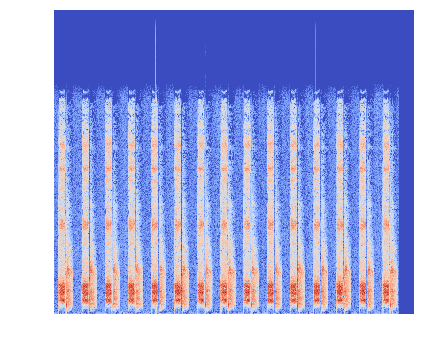

In [112]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import librosa.display
from tqdm import tqdm

%matplotlib inline

y, sr = librosa.load('')
r=librosa.stft(y)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=1024)
print(S.shape)
log_S = librosa.amplitude_to_db(r)

plt.figure(figsize=(6,5))

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

#plt.title('mel power spectrogram')
#plt.colorbar(format='%+02.0f dB')
plt.axis('off')
plt.tight_layout()
plt.savefig('Spectrogram_mask.jpg',)

In [143]:
def griffinlim(spectrogram, n_iter = 100, window = 'hann', n_fft = 2048, hop_length = -1, verbose = True):
    if hop_length == -1:
        hop_length = n_fft // 4
    angles = np.exp(2j * np.pi * np.random.rand(*spectrogram.shape))
    t = tqdm(range(n_iter), ncols=100, mininterval=2.0, disable=not verbose)
    for i in t:
       # print(i)
        #print(angles.shape)
        #print(spectrogram.shape)
        #print(np.abs(spectrogram).astype(np.complex).shape)
        full = np.abs(spectrogram).astype(np.complex) * angles
        inverse = librosa.istft(full, hop_length = hop_length, window = window)
        rebuilt = librosa.stft(inverse, n_fft = n_fft, hop_length = hop_length, window = window)
        angles = np.exp(1j * np.angle(rebuilt))

        if verbose:
            diff = np.abs(spectrogram) - np.abs(rebuilt)
            t.set_postfix(loss=np.linalg.norm(diff, 'fro'))

    full = np.abs(spectrogram).astype(np.complex) * angles
    inverse = librosa.istft(full, hop_length = hop_length, window = window)

    return inverse

In [144]:
inverse=griffinlim(log_S)



 15%|███████                                        | 15/100 [00:06<00:37,  2.27it/s, loss=1.25e+04]
Exception in thread Thread-73:
Traceback (most recent call last):
  File "/home/nestyme/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/nestyme/anaconda3/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/nestyme/anaconda3/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████████████████████████████████████████| 100/100 [00:50<00:00,  1.99it/s, loss=9.91e+03]


In [193]:
librosa.output.write_wav(y=inverse,sr=sr,path='')

In [161]:
x = [i for i in range(len(scaled))]

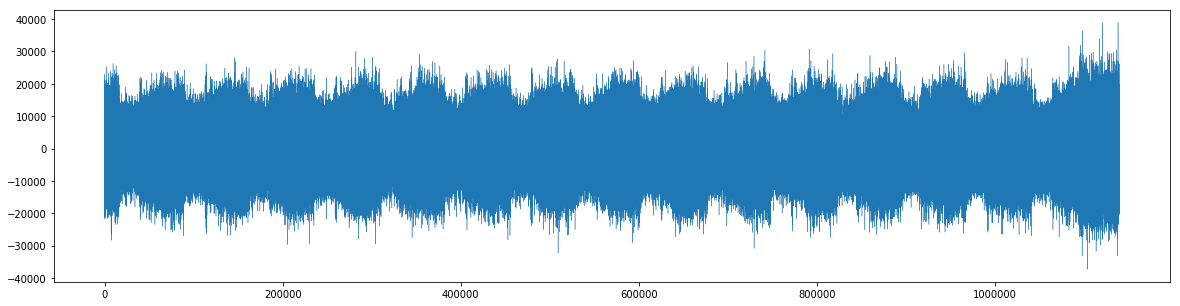

In [172]:
plt.figure(figsize=(20,5))
plt.plot(x,scaled,linewidth=0.4)
plt.show()